#**Sharvari Lahane**
#**Data Science - Batch May 2024 (Baner, Pune) - Assignment 12**
#**EDA_2**

**Task 1: Data Exploration and Preprocessing**

Importing Libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Loading the dataset

In [5]:
df = pd.read_csv('adult_with_headers.csv')

In [13]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Summary statistics

In [15]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [16]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


Checking for missing values

In [17]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Data types

In [18]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


Handling Missing Values

Checking the percentage of missing values in each column

In [19]:
missing_values = df.isnull().mean().sort_values(ascending=False)
print(missing_values)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


Droping columns with more than 50% missing values (if any)

In [20]:
df = df.drop(columns=missing_values[missing_values > 0.5].index)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Imputing missing values for categorical features with the mode (most frequent value)

In [21]:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Imputing missing values for numerical features with the median

In [22]:
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].median(), inplace=True)

Scaling Techniques

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

List of numerical columns

In [24]:
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Standard Scaling

In [25]:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_standard_scaled[numerical_columns])

In [26]:
standard_scaler

StandardScaler()

In [27]:
df_standard_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [28]:
df_standard_scaled[numerical_columns]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


Min-Max Scaling

In [29]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df_minmax_scaled[numerical_columns])

In [30]:
minmax_scaler

MinMaxScaler()

In [31]:
df_minmax_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [32]:
df_minmax_scaled[numerical_columns]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


Displaying the scaled data

In [33]:
print(df_standard_scaled.head())
print(df_minmax_scaled.head())

        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0      0.148453      -0.21

Discuss the scenarios where each scaling technique is preferred and why.

**Standard scaling:**

Standard scaling is preferred when the features have different units or scales, and we want to normalize them to have zero mean and unit variance.

This is useful when we want to prevent features with large ranges from dominating the model.

**Min-max scaling:**

Min-max scaling is preferred when we want to preserve the original distribution of the features and only scale them to a common range (e.g., [0, 1]).

This is useful when we want to maintain the relative importance of each feature.

**Task 2: Encoding Techniques**

Categorical columns

In [34]:
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Identifying categorical columns with less than 5 categories

In [35]:
few_category_columns = [col for col in categorical_columns if col in df.columns and df[col].nunique() < 5]

Applying One-Hot Encoding

In [36]:
df_one_hot_encoded = pd.get_dummies(df, columns=few_category_columns)
print(df_one_hot_encoded.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0              40   United-States   <=50K   
1             0             0              13   

Label Encoding for Categorical Variables with More Than 5 Categories

In [37]:
from sklearn.preprocessing import LabelEncoder

Identifying categorical columns with more than 5 categories

In [38]:
many_category_columns = [col for col in categorical_columns if col in df.columns and df[col].nunique() >= 5]

Applying Label Encoding to columns with more than 5 categories

In [39]:
label_encoders = {}
for col in many_category_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("DataFrame after Label Encoding:")
print(df.head())

DataFrame after Label Encoding:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1       

Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**One-Hot Encoding vs Label Encoding:**

One-Hot Encoding (OHE)

Pros:

Handling non-ordinal categorical variables:

OHE is particularly useful when dealing with categorical variables that don't have a natural order or hierarchy (e.g., colors, countries).

Avoiding implicit ordering:

By creating a binary vector for each category, OHE prevents the model from assuming an implicit order between categories.

Easy to implement:

OHE is a straightforward technique to implement, especially with libraries like pandas and scikit-learn.

Cons:

High dimensionality:

OHE can result in a large number of features, leading to the curse of dimensionality and increased computational costs.

Sparse matrices:

The resulting matrices can be sparse, which may lead to inefficient storage and computation.

Label Encoding (LE)

Pros:

Low dimensionality:

LE only requires a single feature to represent the categorical variable, reducing dimensionality and computational costs.

Ordinal categorical variables:

LE is suitable for ordinal categorical variables, where there is a natural order or hierarchy (e.g., education levels, ratings).

Cons:

Implicit ordering:

LE assumes an implicit order between categories, which can be problematic if the order is not meaningful.

Not suitable for non-ordinal variables:

LE can lead to poor performance or misleading results when applied to non-ordinal categorical variables.

**Task 3: Feature Engineering**

Creating Age Group Feature

In [40]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elder'])
df['age_group']

,age_group
0,Adult
1,Adult
2,Adult
3,Senior
4,Young Adult
...,...
32556,Young Adult
32557,Adult
32558,Senior
32559,Young Adult


Creating Capital Net Gain Feature

In [41]:
df['capital_net_gain'] = df['capital_gain'] - df['capital_loss']
df['capital_net_gain']

,capital_net_gain
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [42]:
print(df[['age', 'age_group', 'capital_gain', 'capital_loss', 'capital_net_gain']].head())

   age    age_group  capital_gain  capital_loss  capital_net_gain
0   39        Adult          2174             0              2174
1   50        Adult             0             0                 0
2   38        Adult             0             0                 0
3   53       Senior             0             0                 0
4   28  Young Adult             0             0                 0


In [43]:
import numpy as np

Applying log transformation to reduce skewness

In [44]:
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain']

,log_capital_gain
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
32556,0.000000
32557,0.000000
32558,0.000000
32559,0.000000


Visualizing the distribution before and after the transformation

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

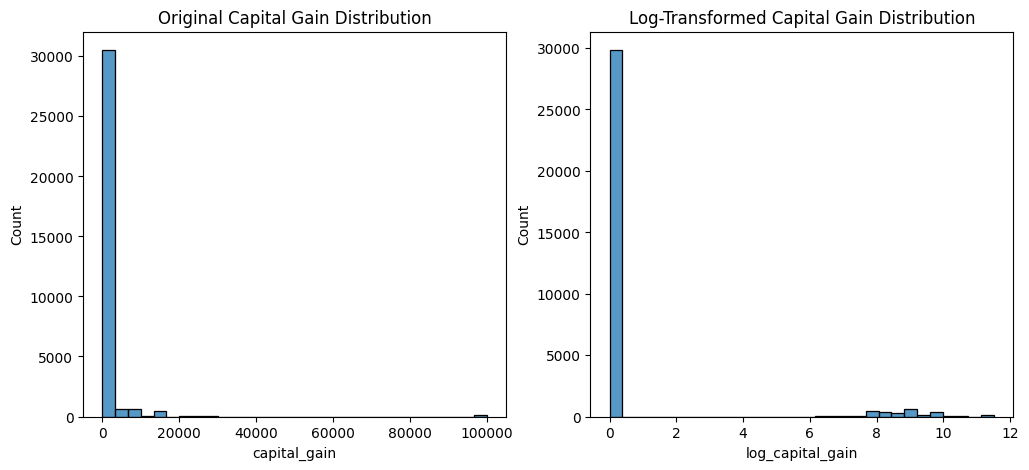

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['capital_gain'], bins=30, ax=ax[0])
ax[0].set_title('Original Capital Gain Distribution')
sns.histplot(df['log_capital_gain'], bins=30, ax=ax[1])
ax[1].set_title('Log-Transformed Capital Gain Distribution')

plt.show()

**Justification:**

The log transformation is useful for skewed data because it compresses the range, reducing the impact of outliers and making the distribution more normal-like, which can improve the performance of many models.

**Task 4: Feature Selection**

In [47]:
from sklearn.ensemble import IsolationForest

Using Isolation Forest to detect outliers

In [48]:
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(df[numerical_columns])

In [49]:
iso

IsolationForest(contamination=0.05)

In [50]:
yhat

array([1, 1, 1, ..., 1, 1, 1])

Selecting all rows that are not outliers

In [51]:
mask = yhat != -1
df = df[mask]

print(f"Data shape after removing outliers: {df.shape}")

Data shape after removing outliers: (30933, 18)


Discuss how outliers can affect model performance.

Outliers can distort the loss functions and degrade the predictive performance of machine learning models by skewing the data distributions. Removing them helps improve model robustness.

Applying Predictive Power Score (PPS)

PPS is a modern approach to finding patterns in data that goes beyond simple correlation by measuring the predictive power of one feature over another.

In [52]:
import ppscore as pps
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Calculating PPS matrix

In [53]:
pps_matrix = pps.matrix(df)
pps_matrix = pps_matrix[pps_matrix['x'] != pps_matrix['y']]

In [54]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1,age,workclass,0.000000,regression,True,mean absolute error,0.709200,0.840477,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75024.194200,76500.423845,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.660000,2.692131,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.772200,1.825327,DecisionTreeRegressor()
5,age,marital_status,0.169811,regression,True,mean absolute error,1.172000,0.972982,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
318,log_capital_gain,hours_per_week,0.000000,regression,True,mean absolute error,7.201600,7.325019,DecisionTreeRegressor()
319,log_capital_gain,native_country,0.000000,regression,True,mean absolute error,1.978200,3.572977,DecisionTreeRegressor()
320,log_capital_gain,income,0.266045,classification,True,weighted F1,0.680313,0.765364,DecisionTreeClassifier()
321,log_capital_gain,age_group,0.000000,classification,True,weighted F1,0.333200,0.327672,DecisionTreeClassifier()


Displaying top relationships according to PPS

In [55]:
print(pps_matrix.sort_values('ppscore', ascending=False).head())

                    x                 y   ppscore            case  \
58          education     education_num  1.000000      regression   
75      education_num         education  1.000000      regression   
15                age         age_group  1.000000  classification   
197      capital_gain  log_capital_gain  0.998202      regression   
305  capital_net_gain  log_capital_gain  0.998202      regression   

     is_valid_score               metric  baseline_score  model_score  \
58             True  mean absolute error        1.772200     0.000000   
75             True  mean absolute error        2.660000     0.000000   
15             True          weighted F1        0.333200     1.000000   
197            True  mean absolute error        0.630343     0.001133   
305            True  mean absolute error        0.630343     0.001133   

                        model  
58    DecisionTreeRegressor()  
75    DecisionTreeRegressor()  
15   DecisionTreeClassifier()  
197   DecisionTree

Compare with correlation matrix

In [56]:
corr_matrix = df.corr()
print(corr_matrix)

                       age  workclass    fnlwgt  education  education_num  \
age               1.000000   0.008202 -0.079562  -0.007359       0.030640   
workclass         0.008202   1.000000 -0.018218   0.019458       0.046723   
fnlwgt           -0.079562  -0.018218  1.000000  -0.024005      -0.043549   
education        -0.007359   0.019458 -0.024005   1.000000       0.352699   
education_num     0.030640   0.046723 -0.043549   0.352699       1.000000   
marital_status   -0.281184  -0.060530  0.028002  -0.034648      -0.056566   
occupation       -0.018702   0.250724 -0.001406  -0.025129       0.104389   
relationship     -0.262151  -0.092751  0.008668  -0.009640      -0.085601   
race              0.026015   0.049385 -0.023016   0.014997       0.028491   
capital_gain      0.089464   0.022548 -0.014463   0.018126       0.126742   
capital_loss      0.016531  -0.008185 -0.022316   0.035249       0.007085   
hours_per_week    0.087602   0.130339 -0.019444   0.052794       0.134874   

**Discussion:**

Unlike traditional correlation which only captures linear relationships, PPS can capture any predictive relationship (linear, non-linear, categorical, etc.).

It's more versatile for finding interactions between variables, making it valuable for feature selection in machine learning.

**Compare PPS with Correlation:**

To compare PPS with the correlation matrix, we will visualize both matrices and interpret the results:

does not rely on the assumption of linearity.

Correlation is specifically useful for identifying linear relationships and the direction of the relationship (positive or negative).